# API Distribution

In [40]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('../train.json', 'r') as file:
    data = json.load(file)

In [3]:
sentences = []
for indexed_data in data:
    sentences.extend([sentence for sentence in indexed_data['conversations'] if sentence["from"] == "assistant"])

In [4]:
processed_sentences = []
for sentence in sentences:
    processed_sentences.append(sentence["value"])

In [5]:
pattern = r'\nAction: ([^\n]+)'
full_apis = [re.search(pattern, sentence).group(1) for sentence in processed_sentences]
filtered_apis = [string for string in full_apis if string != 'Finish']
apis = [string.split('_for_', 1)[1] if '_for_' in string else string for string in filtered_apis]
apis = [s.replace("_", "-") for s in apis]


In [6]:
file_path = 'api_data.csv'
api_data = pd.read_csv(file_path)

In [7]:
popularity = api_data.iloc[:, [-4, -3]]
new_column_labels = ['API', 'Popularity']
popularity.columns = new_column_labels

/var/folders/xb/3m56xth16qx5jh4mhz452p7r0000gn/T/ipykernel_84283/2883599446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity['Popularity'] = pd.to_numeric(popularity['Popularity'], errors='coerce')


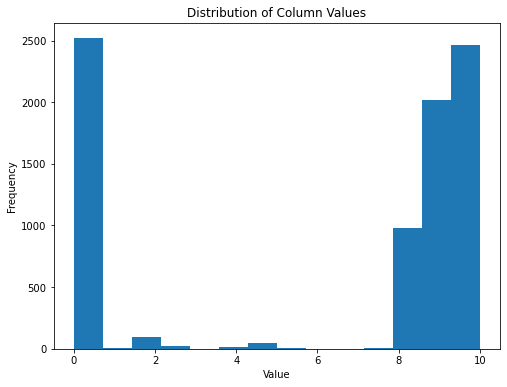

In [8]:
popularity['Popularity'] = pd.to_numeric(popularity['Popularity'], errors='coerce')

# Plotting the distribution
plt.figure(figsize=(8, 6))
plt.hist(popularity['Popularity'].dropna(), bins='auto')  # Drop NaNs for plotting
plt.title('Distribution of Column Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [9]:
indices_above_6 = popularity[popularity['Popularity'] > 6].index

In [10]:
len(indices_above_6)

5466

In [11]:
api_data = api_data.loc[indices_above_6].iloc[:, [-4, -2]]
new_column_labels = ['API', 'Delay']
api_data.columns = new_column_labels

# Selecting the subset of df2 based on these indices
api_data

,API,Delay
0,/api-sports/api/api-football-beta/,232 ms
1,/apidojo/api/livescore6/,"1,723 ms"
2,/SportspageFeeds/api/sportspage-feeds/,116 ms
3,/theapiguy/api/thesportsdb/,216 ms
4,/api-sports/api/api-nba/,342 ms
...,...,...
17669,/safu92/api/simple-otp/,"2,239 ms"
17673,/lazenifofana/api/dns-tunneling-detection-api/,"5,042 ms"
17674,/narukaakshat/api/random-password1/,942 ms
17675,/amofficial9192/api/stay-safe-threat-intel-api/,"8,256 ms"


In [12]:
mapping_dict = api_data.set_index("API")['Delay'].to_dict()

In [13]:
# check proportion

In [14]:
cleaned_delays = [num for num in api_data["Delay"] if num == num]
converted_delays = [int(delay.replace(' ms', '').replace(',', '')) for delay in cleaned_delays]

In [15]:
len([i for i in converted_delays if i < 100]) / len(converted_delays)

0.06220270764727406

### Mapping & Generating Dist

In [30]:
len(mapping_dict)

5466

In [31]:
unique_api = list(set(apis))
len(unique_api)

2817

In [32]:
delays = []

for s in apis:
    for key in mapping_dict:
        if set(s).issubset(set(key)):
            delays.append(mapping_dict[key])
            break

print(delays)

['681 ms', '681 ms', '681 ms', '30 ms', '134 ms', '924 ms', '114 ms', '2,337 ms', '2,337 ms', '1,896 ms', '1,896 ms', '1,896 ms', '924 ms', '3,068 ms', '3,068 ms', '3,068 ms', '3,068 ms', '681 ms', '493 ms', '493 ms', '216 ms', '681 ms', '4,310 ms', '216 ms', '4,310 ms', '306 ms', '766 ms', '30 ms', '1,609 ms', '1,609 ms', '766 ms', '766 ms', '766 ms', '766 ms', '924 ms', '924 ms', '924 ms', '1,163 ms', '1,163 ms', '1,609 ms', '681 ms', '116 ms', '116 ms', '15,569 ms', '924 ms', '1,609 ms', '6,731 ms', '6,731 ms', '216 ms', '1,593 ms', '1,593 ms', '134 ms', '493 ms', '114 ms', '114 ms', '114 ms', '766 ms', '27,296 ms', '27,296 ms', '4,417 ms', '4,417 ms', '924 ms', '924 ms', '924 ms', '182 ms', '182 ms', '1,779 ms', '94 ms', '766 ms', '3,647 ms', '6,456 ms', '766 ms', '766 ms', '766 ms', '654 ms', '654 ms', '766 ms', '654 ms', '134 ms', '134 ms', '134 ms', '766 ms', '766 ms', '766 ms', '6,456 ms', '1,256 ms', '114 ms', '114 ms', '30 ms', '1,285 ms', '1,285 ms', '924 ms', '21,723 ms', '

In [33]:
cleaned_delays = [num for num in delays if num == num]

In [34]:
len(cleaned_delays)

69065

In [35]:
cleaned_delays

['681 ms',
 '681 ms',
 '681 ms',
 '30 ms',
 '134 ms',
 '924 ms',
 '114 ms',
 '2,337 ms',
 '2,337 ms',
 '1,896 ms',
 '1,896 ms',
 '1,896 ms',
 '924 ms',
 '3,068 ms',
 '3,068 ms',
 '3,068 ms',
 '3,068 ms',
 '681 ms',
 '493 ms',
 '493 ms',
 '216 ms',
 '681 ms',
 '4,310 ms',
 '216 ms',
 '4,310 ms',
 '306 ms',
 '766 ms',
 '30 ms',
 '1,609 ms',
 '1,609 ms',
 '766 ms',
 '766 ms',
 '766 ms',
 '766 ms',
 '924 ms',
 '924 ms',
 '924 ms',
 '1,163 ms',
 '1,163 ms',
 '1,609 ms',
 '681 ms',
 '116 ms',
 '116 ms',
 '15,569 ms',
 '924 ms',
 '1,609 ms',
 '6,731 ms',
 '6,731 ms',
 '216 ms',
 '1,593 ms',
 '1,593 ms',
 '134 ms',
 '493 ms',
 '114 ms',
 '114 ms',
 '114 ms',
 '766 ms',
 '27,296 ms',
 '27,296 ms',
 '4,417 ms',
 '4,417 ms',
 '924 ms',
 '924 ms',
 '924 ms',
 '182 ms',
 '182 ms',
 '1,779 ms',
 '94 ms',
 '766 ms',
 '3,647 ms',
 '6,456 ms',
 '766 ms',
 '766 ms',
 '766 ms',
 '654 ms',
 '654 ms',
 '766 ms',
 '654 ms',
 '134 ms',
 '134 ms',
 '134 ms',
 '766 ms',
 '766 ms',
 '766 ms',
 '6,456 ms',
 '1,2

In [36]:
converted_delays = [int(delay.replace(' ms', '').replace(',', '')) for delay in cleaned_delays]
len([i for i in converted_delays if i < 100]) / len(converted_delays)

0.04002027075942952

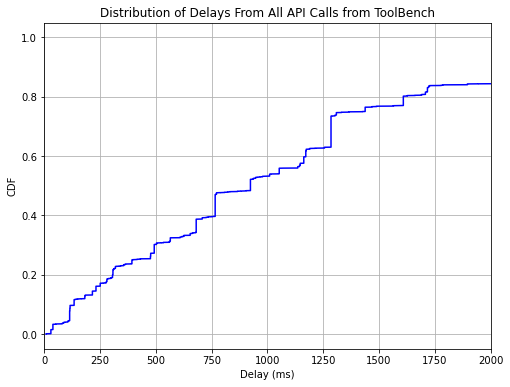

In [48]:
data_sorted = np.sort(converted_delays)

cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

plt.figure(figsize=(8, 6))
plt.plot(data_sorted, cdf, linestyle='-', color='blue')  # Using a solid line for the plot
plt.title('Distribution of Delays From All API Calls from ToolBench')
plt.xlabel('Delay (ms)')
plt.ylabel('CDF')
plt.xlim(0, 2000)
plt.grid(True)
plt.show()

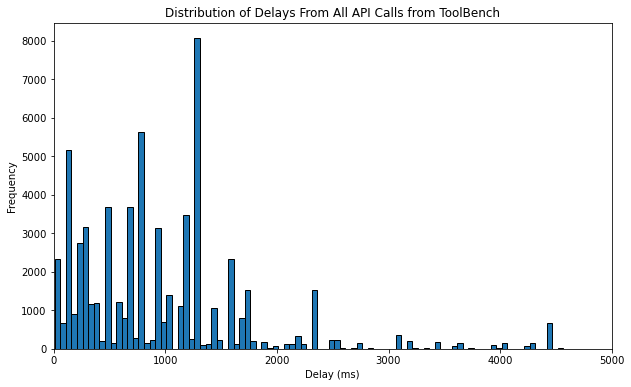

In [23]:

plt.figure(figsize=(10, 6))
plt.hist(converted_delays, bins=len(set(converted_delays)) * 10, edgecolor='black')
plt.xlabel('Delay (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Delays From All API Calls from ToolBench')
plt.xlim(0, 5000)
plt.show()

In [49]:
delays_unique = []

for s in unique_api:
    for key in mapping_dict:
        if set(s).issubset(set(key)):
            delays_unique.append(mapping_dict[key])
            break

print(delays_unique)

['1,285 ms', '493 ms', '232 ms', '4,031 ms', '279 ms', '1,717 ms', '1,309 ms', '2,096 ms', '308 ms', '87 ms', '109,509 ms', '534 ms', '565 ms', '306 ms', '391 ms', '3,994 ms', '116 ms', '251 ms', '216 ms', '281 ms', '114 ms', '1,438 ms', '924 ms', '1,723 ms', '114 ms', '493 ms', '134 ms', '115 ms', '1,285 ms', '924 ms', '1,285 ms', '306 ms', '1,609 ms', '1,174 ms', '182 ms', '1,172 ms', '866 ms', '232 ms', '563 ms', '232 ms', '1,285 ms', '2,131 ms', '1,285 ms', '924 ms', '1,147 ms', '681 ms', '2,698 ms', '114 ms', '924 ms', '182 ms', '1,708 ms', '114 ms', '681 ms', '1,285 ms', '306 ms', '1,609 ms', '1,017 ms', '708 ms', '114 ms', '3,647 ms', '27,296 ms', '822 ms', '965 ms', '278 ms', '114 ms', '1,285 ms', '772 ms', '885 ms', '1,285 ms', '609 ms', '1,285 ms', '16,018 ms', '232 ms', '52 ms', '3,096 ms', '681 ms', '1,147 ms', '766 ms', '626 ms', '1,717 ms', '1,285 ms', '924 ms', '1,285 ms', '3,597 ms', '663 ms', '4,303 ms', '1,309 ms', '609 ms', '393 ms', '1,609 ms', '393 ms', '493 ms', '

In [50]:
cleaned_delays_unique = [num for num in delays_unique if num == num]
converted_delays = [int(delay.replace(' ms', '').replace(',', '')) for delay in cleaned_delays_unique]

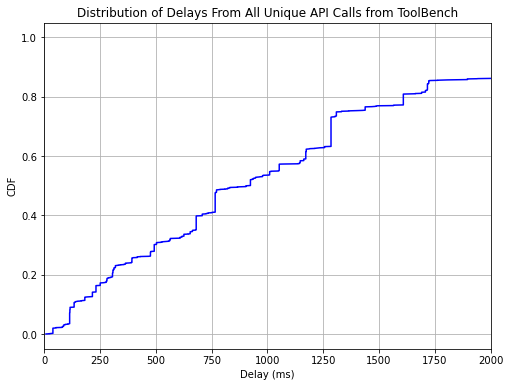

In [52]:
data_sorted = np.sort(converted_delays)

cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

plt.figure(figsize=(8, 6))
plt.plot(data_sorted, cdf, linestyle='-', color='blue')  # Using a solid line for the plot
plt.title('Distribution of Delays From All Unique API Calls from ToolBench')
plt.xlabel('Delay (ms)')
plt.ylabel('CDF')
plt.xlim(0, 2000)
plt.grid(True)
plt.show()

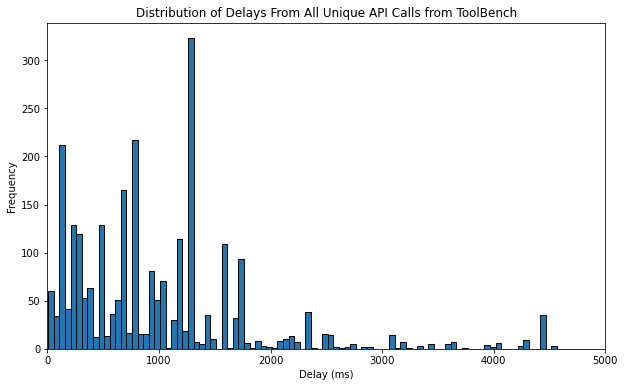

In [26]:

plt.figure(figsize=(10, 6))
plt.hist(converted_delays, bins=len(set(converted_delays)) * 10, edgecolor='black')
plt.xlabel('Delay (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Delays From All Unique API Calls from ToolBench')
plt.xlim(0, 5000)
plt.show()

### All possible API delay distribution

In [27]:
all_apis = list(mapping_dict.values())


In [28]:
cleaned_all_apis = [num for num in all_apis if num == num]
len(cleaned_all_apis)

5466

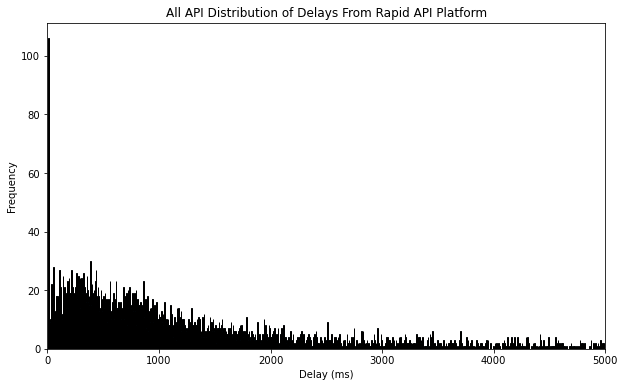

In [29]:
converted_delays = [int(delay.replace(' ms', '').replace(',', '')) for delay in cleaned_all_apis]
converted_delays = [converted_delay for converted_delay in converted_delays if converted_delay > 5]

plt.figure(figsize=(10, 6))
plt.hist(converted_delays, bins=len(set(converted_delays)) * 10, edgecolor='black')
plt.xlabel('Delay (ms)')
plt.ylabel('Frequency')
plt.title('All API Distribution of Delays From Rapid API Platform')
plt.xlim(0, 5000)
plt.show()

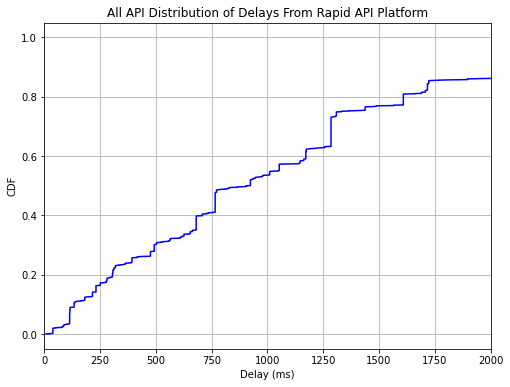

In [53]:
data_sorted = np.sort(converted_delays)

cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

plt.figure(figsize=(8, 6))
plt.plot(data_sorted, cdf, linestyle='-', color='blue')  # Using a solid line for the plot
plt.title('All API Distribution of Delays From Rapid API Platform')
plt.xlabel('Delay (ms)')
plt.ylabel('CDF')
plt.xlim(0, 2000)
plt.grid(True)
plt.show()